# Introduction to Multilayer Neural Network

A multilayer neural network is a neural network with many layers, which is responsible for approximating the relationship between pairs of relations $(x, y)$ in the training set with a function of the form:

$$\mathbf{y}\approx g^{(l)}(g^{(l - 1)}(\ldots(g^{(2)}(g^{(1)}(\mathbf{x})))))$$

In which, $l$ is the number of layers $(1\leq l\leq L)$, $\mathbf{x}$ is the feature vector and $\mathbf{y}$ is the label vector. The function $g$ will be defined based on the matrix of vectors $\mathbf{a}$, and $\mathbf{a}_i$ is the output based on the input of the previous layer $(i\neq 0)$:

$$g^{(l)}(\mathbf{a}^{(l-1)}) = f^{(l)}\left(\mathbf{W}^{(l)^T}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}\right)$$ 

where $\mathbf{W}^{(l)}, \mathbf{b}^{(l)}$ are the matrix of weight vectors and bias vectors corresponding to the $l^{th}$ layer, respectively, $f^{(l)}$ is the activation function.

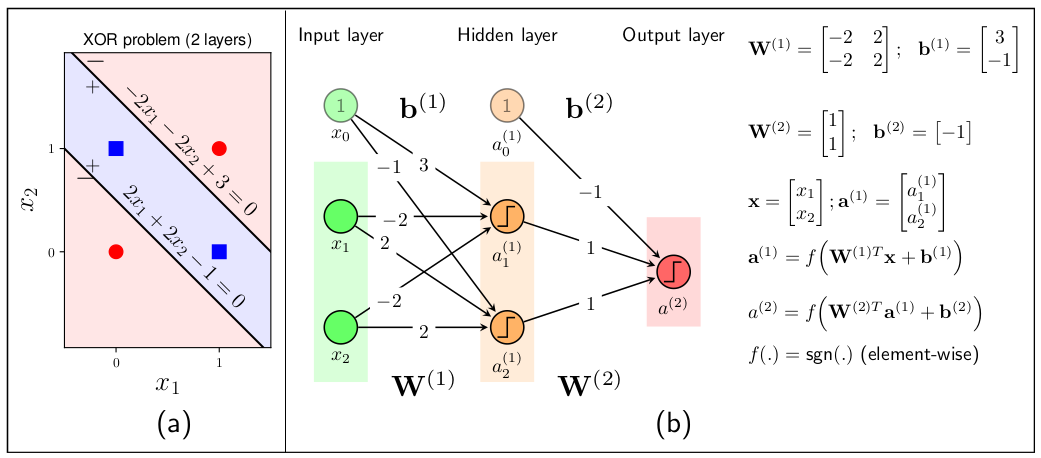

_Figure: An example of a perceptron representing the XOR function (This section should be read further for better understanding in the $[1]$ documentation)_

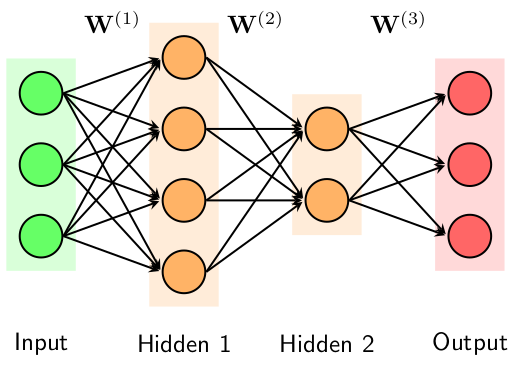

_Figure: MLP with two hidden layers (hidden biases)_

The output of this type of multilayer neural network for an input $\mathbf{x}$ can be calculated as:

$$
\begin{align*}
    \mathbf{a}^{(0)} &= \mathbf{x} \newline
    z_{i}^{(l)} &= \mathbf{w}_i^{(l)T}\mathbf{a}^{(l-1)} + b_i^{(l)} \newline
    \mathbf{z}^{(l)}  &= \mathbf{W}^{(l)T}\mathbf{a}^{(l-1)} + \mathbf{b}^{(l)},~~ l =  1, 2, \dots, L \newline
    \mathbf{a}^{(l)} &= f(\mathbf{z}^{(l)}), ~~ l =  1, 2, \dots, L \newline
    \mathbf{\hat{y}} &= \mathbf{a}^{(L)}
\end{align*}
$$

This is the predicted output. This step is called feedforward because the computation is performed from the beginning to the end of the network. The satisfaction loss function reaches a small value when this output is close to the true output. Depending on the problem, whether it is classification or regression, we need to design appropriate loss functions.

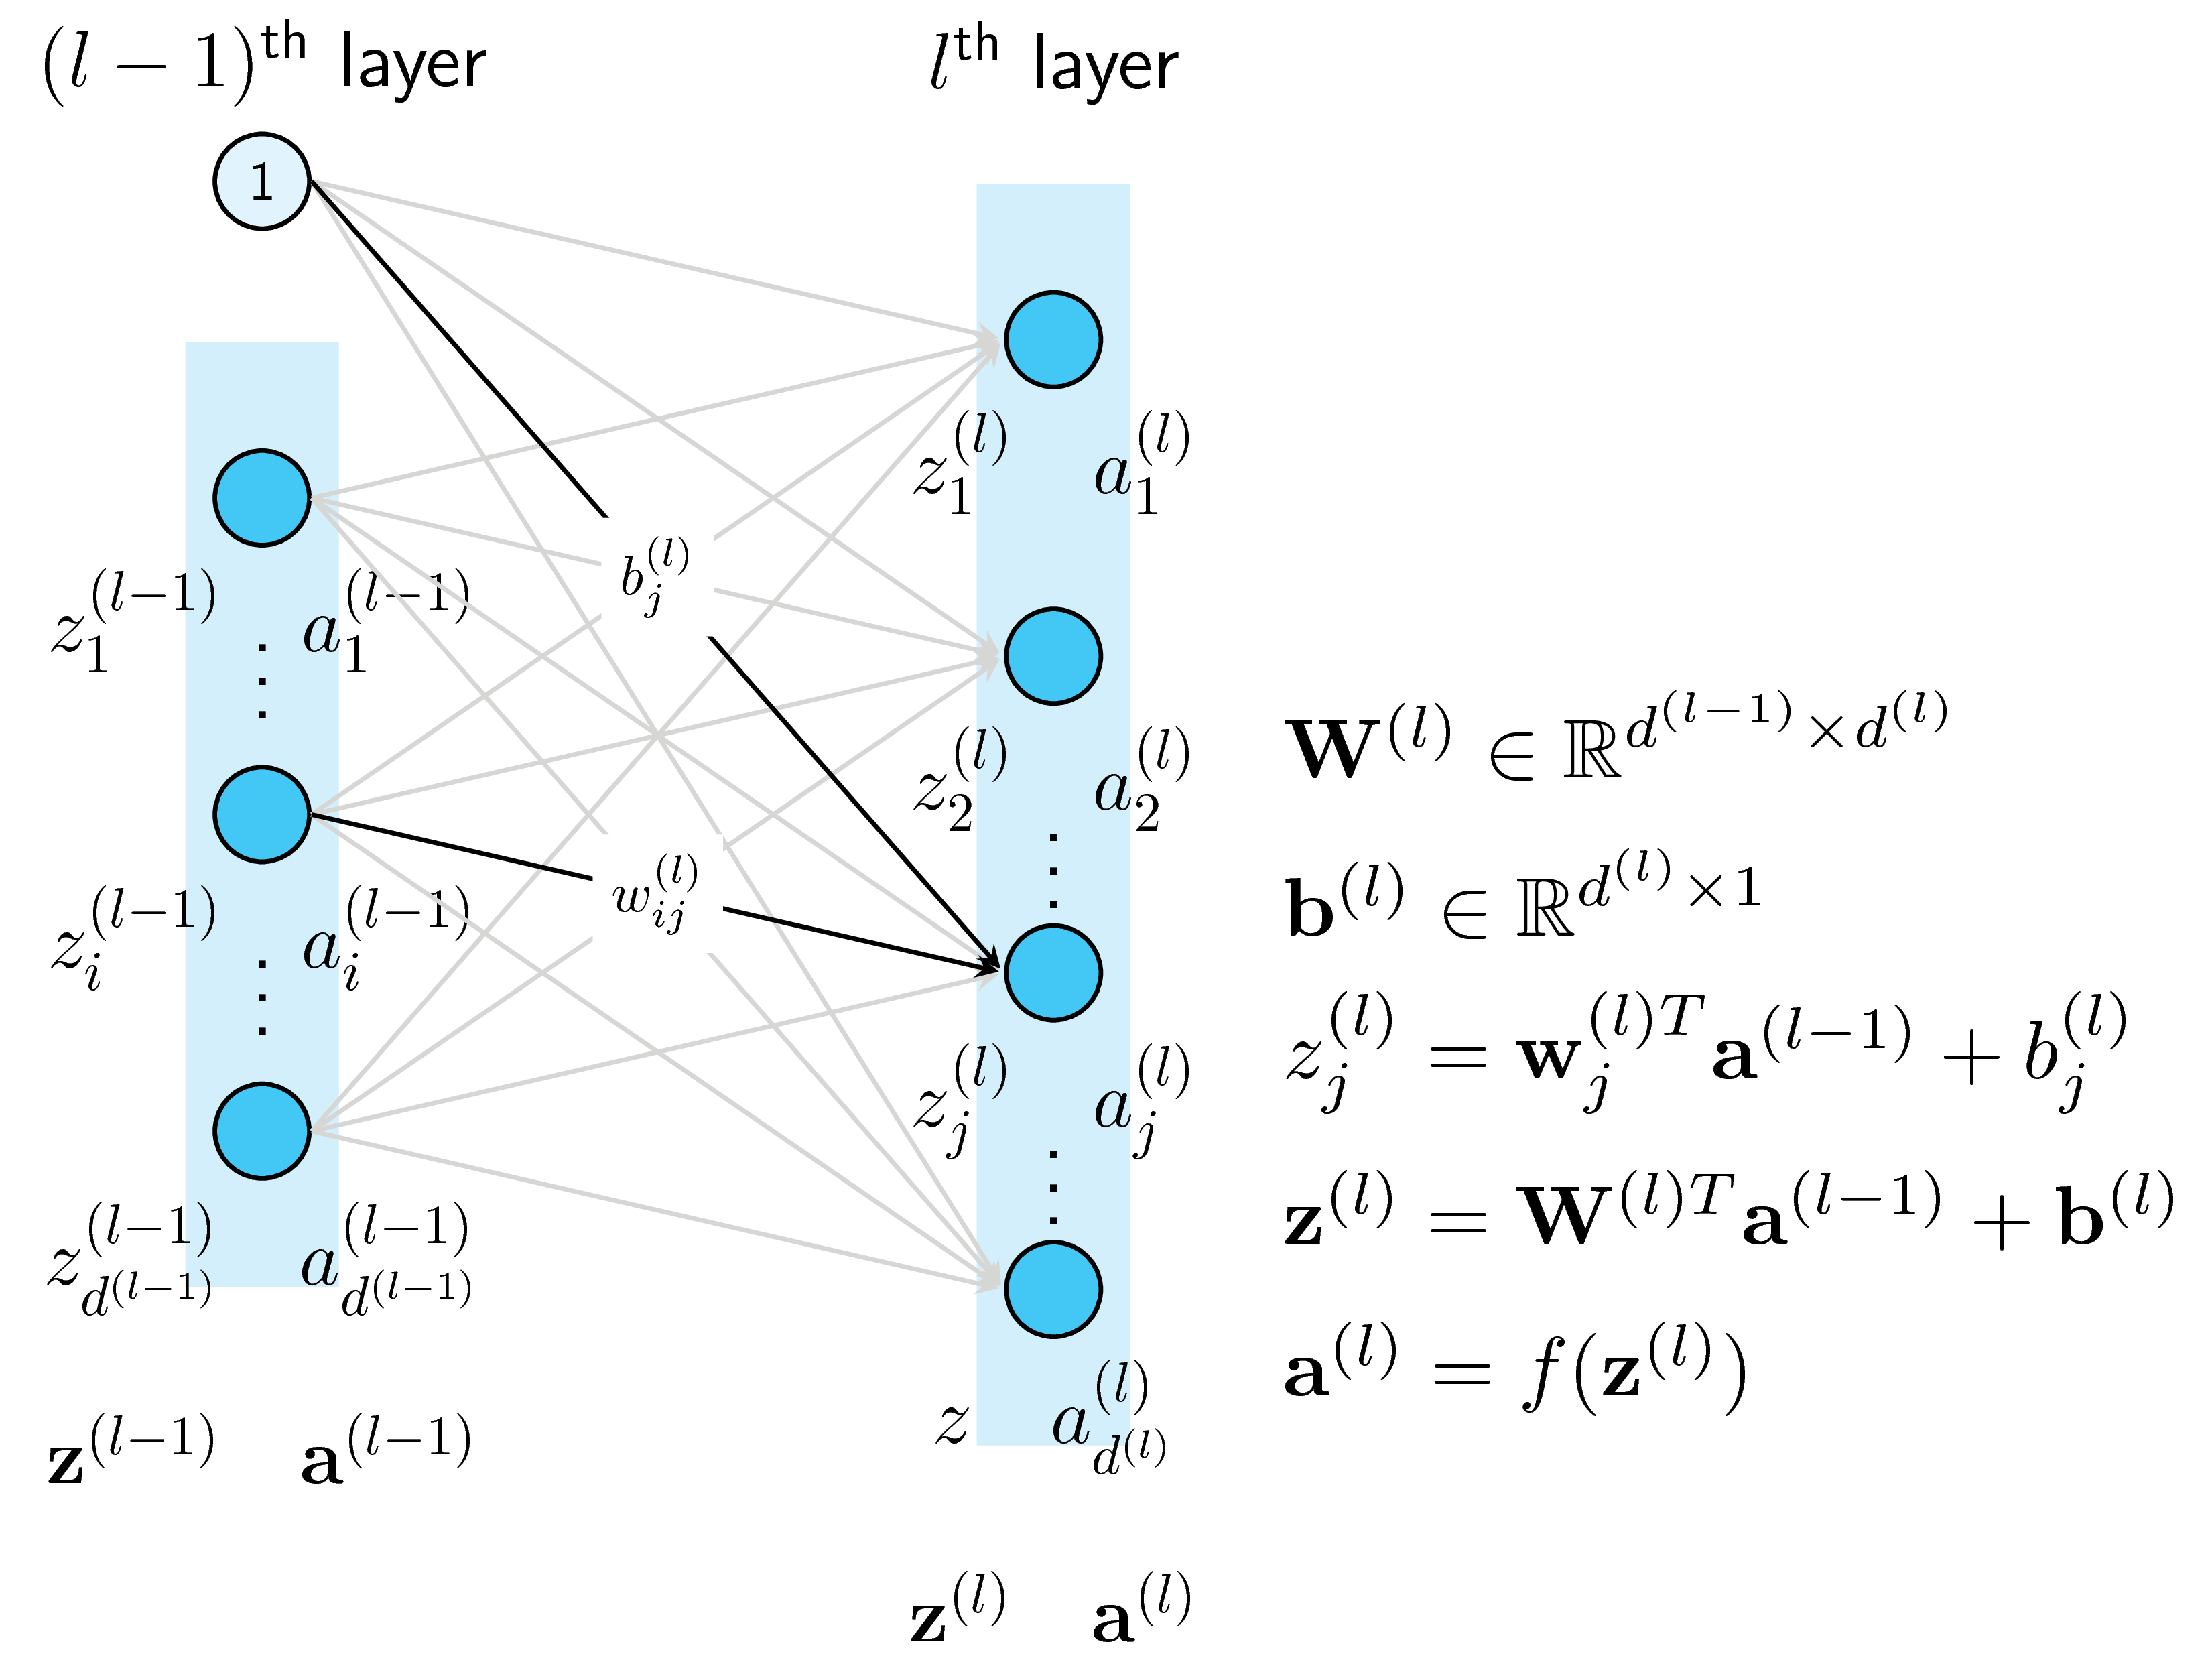

_Figure: Symbols used in MLP_

## ReLU activation function

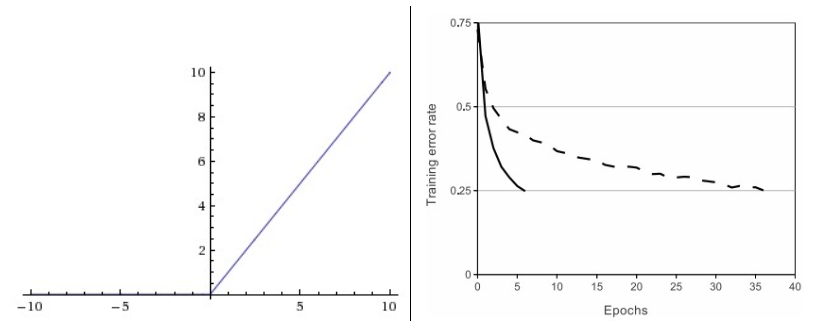

_Figure: **Left**: Rectified Linear Unit (ReLU) activation function, which is zero when $x < 0$ and then linear with slope 1 when $x > 0$. **Right**: A plot from [Krizhevsky et al.](https://www.cs.toronto.edu/~fritz/absps/imagenet.pdf) (pdf) paper indicating the 6x improvement in convergence with the ReLU unit compared to the [tanh](https://github.com/letruongzzio/Machine-Learning/blob/main/5%20-%20Neural%20Networks/Logistic%20Regression/Logistic%20Regression.ipynb) unit_

The Rectified Linear Unit has become very popular in the last few years. It computes the function $f(x) = \max(0, x)$. In other words, the activation is simply thresholded at zero (see image above on the left). There are several pros and cons to using the ReLUs:

+ (+) It was found to greatly accelerate (e.g. a factor of 6 in [Krizhevsky et al.](https://www.cs.toronto.edu/~fritz/absps/imagenet.pdf)) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form.
+ (+) Compared to tanh/sigmoid neurons that involve expensive operations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero.
+ (-) Unfortunately, ReLU units can be fragile during training and can “die”. For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. For example, you may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. With a proper setting of the learning rate this is less frequently an issue.

Furthermore, some key prospects can be mentioned that:

+ This speedup is attributed to the fact that ReLU is computed almost instantaneously and its gradient is also calculated extremely fast with the gradient being 1 if the input is greater than 0, 0 if the input is less than 0.
+ Although the ReLU function has no derivative at $s = 0$, in practice, people often define $\text{ReLU}'(0) = 0$ and further assert that the probability that the input of a unit equal to 0 is very small.

# Backpropagation

The most popular method to optimize multilayer neural networks is gradient descent (GD). To apply GD, we need to calculate the derivative of the loss function according to each weight matrix $\mathbf{W}^{(l)}$ and bias vector $\mathbf{b}^{(l)}$.

Suppose $J(\mathbf{W, b, X, Y})$ is a loss function of the problem, where $\mathbf{W, b}$ is the set of all weight matrices between layers and the bias vector of each layer. $\mathbf{X, Y}$ are pairs of training data with each column corresponding to a data point. To be able to apply gradient descent methods, we need to calculate:

$$\frac{\partial J}{\partial \mathbf{W}^{(l)}} ; \frac{\partial J}{\partial \mathbf{b}^{(l)}},~~ l = 1, 2, \dots, L$$

An example of a loss function is the Mean Square Error (MSE) function, which is the average of squared errors:

$$J(\mathbf{W, b, X, Y}) = \frac{1}{N}\sum_{n=1}^N || \mathbf{y}_n - \mathbf{\hat{y}}_n||_2^2 = \frac{1}{N}\sum_{n=1}^N || \mathbf{y}_n - \mathbf{a}_n^{(L)}||_2^2$$

where $N$ is the number of data pairs $(\mathbf{x, y})$ in the training set. According to these formulas, direct calculation of derivative values ​​is extremely complicated because the loss function does not directly depend on the coefficient matrices and bias vectors. The most commonly used method is called backpropagation which helps calculate the inverse derivative from the last layer to the first layer. The last layer is calculated first because it is closer to the predicted output and loss function. Calculating the derivative of the coefficient matrices in the previous layers is done based on a familiar chain rule for the derivative of composite functions.

Stochastic gradient descent can be used to calculate gradients for weight and bias matrices based on a pair of $(\mathbf{x, y})$ training points. For simplicity, we consider $J$ as a loss function if we only consider this pair of points, here $J$ is any loss function, not just the MSE function as above. Derivative of the loss function with respect to just one component of the output layer's weight matrix:

$$\frac{\partial J}{\partial w_{ij}^{(L)}} = \frac{\partial J}{\partial z_j^{(L)}}. \frac{\partial z_j^{(L)}}{\partial w_{ij}^{(L)}} = e_j^{(L)} a_i^{(L-1)}$$

where $e_j^{(L)} = \displaystyle\frac{\partial J}{\partial z_j^{(L)}}$ is usually a quantity that is not too difficult to calculate and $\displaystyle\frac{\partial z_j^{(L)}}{\partial w_{ij}^{(L)}}  = a_i^{(L-1)}$ as $z_j^{(L)} = \mathbf{w}_j^{(L)T}\mathbf{a}^{(L-1)} + b_j^{(L)}$. Similarly, the derivative of the loss function with respect to the bias of the last layer is:

$$\frac{\partial J}{\partial b_{j}^{(L)}} = \frac{\partial J}{\partial z_j^{(L)}}. \frac{\partial z_j^{(L)}}{\partial b_{j}^{(L)}} = e_j^{(L)}$$

For derivatives with respect to coefficients in the lower $l$ layers, let's look at _Figure: Symbols used in MLP_. Here, at each unit, input $z$ and output $a$ are written separately for our convenience.

Based on _Figure: Symbols used in MLP_, by backward induction from the end, we can calculate:

$$\frac{\partial J}{\partial w_{ij}^{(l)}} = \frac{\partial J}{\partial z_j^{(l)}}. \frac{\partial z_j^{(l)}}{\partial w_{ij}^{(l)}} = e_j^{(l)} a_i^{(l-1)}$$

with:

$$
\begin{align*}
    e_j^{(l)} &= \frac{\partial J}{\partial z_j^{(l)}} = \frac{\partial J}{\partial a_j^{(l)}} . \frac{\partial a_j^{(l)}}{\partial z_j^{(l)}} \newline
    &= \left( \sum_{k = 1}^{d^{(l+1)}} \frac{\partial J}{\partial z_k^{(l+1)}} .\frac{\partial z_k^{(l+1)}}{\partial a_j^{(l)}} \right) f’(z_j^{(l)}) = \left( \sum_{k = 1}^{d^{(l+1)}} e_k^{(l+1)} w_{jk}^{(l+1)} \right) f’(z_j^{(l)}) \\
    &= \left( \mathbf{w}_{j:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_j^{(l)}) \newline
\end{align*}
$$

in which $\mathbf{e}^{(l+1)} = [e_1^{(l+1)}, e_2^{(l+1)}, \ldots, e_{d^{(l+1)}}^{(l+1)}]^T \in \mathbb{R}^{d^{(l+1)}\times 1}$ and $\mathbf{w}_{j:}^{(l+1)}$ is interpreted as the $j^{th}$ row of the matrix $\mathbf{W}^{(l+1)}$ (note the colon, when it is absent, I denote it by default to the column vector).

The $\sum$ sum sign in the second line of the above calculation appears because $a_j^{(l)}$ contributes to the calculation of all $z_k^{(l+1)}, k = 1, 2, \ldots, d^{(l+1)}$. The derivative expression outside the large parentheses is because $a_j^{(l)} = f(z_j^{(l)})$. At this point, we can see that having an activation function with a simple derivative will be very useful in calculations. Using the same method, readers can infer:

$$\frac{\partial J}{\partial b_j^{(l)}} = e_j^{(l)}$$

Notice that in the above formulas, calculating $e_j$ plays an important role. Furthermore, to calculate this value, we need to calculate $e_j^{(l+1)}$. In other words, we need to calculate these values ​​backwards from the end. The name _backpropagation_ also comes from this.

## Summarize the backpropagation algorithm

### Derivative with respect to each coefficient $w_{ij}^{(l)}, b_i^{(l)}$

1. _Feedforward_ step: With 1 input value $\mathbf{x}$, calculate the output value of the network. During the calculation process, save the activation values $​\mathbf{a}^{(l)}$ at each layer.
2. For each unit j in the output layer, calculate: 
$$e_j^{(L)} = \frac{\partial J}{\partial z_j^{(L)}}; \ \ \frac{\partial J}{\partial w_{ij}^{(L)}} = a_i^{(L-1)}e_j^{(L)}; \ \ \frac{\partial J}{\partial b_{j}^{(L)}} = e_j^{(L)}$$
3. With $l = L-1, L-2, \ldots, 1$, calculate:
$$e_j^{(l)} = \left( \mathbf{w}_{j:}^{(l+1)} \mathbf{e}^{(l+1)} \right) f’(z_j^{(l)})$$
4. Update the derivative for each efficient:
$$\frac{\partial J}{\partial w_{ij}^{(l)}} = a_i^{(l-1)} e_j^{(l)}; \ \ \frac{\partial J}{\partial b_{j}^{(l)}} = e_j^{(l)}$$

### Derivative with respect to matrix $\mathbf{W}^{(l)}, \mathbf{b}^{(l)}$

Set $\mathbf{e}^{(l)} = [e_1^{(l)}, e_2^{(l)}, \ldots, e_{d^{(l)}}^{(l)}]^T \in \mathbb{R}^{d^{(l)}\times 1}$, we have the following principle calculation::

1. _Feedforward_ step: With 1 input value $\mathbf{x}$, calculate the output value of the network. During the calculation process, save the activation values $​\mathbf{a}^{(l)}$ at each layer.
2. With output layer, calculate:
$$\mathbf{e}^{(L)} = \nabla_{\mathbf{z}^{(L)}} J\in\mathbb{R}^{d^{(L)}}; \ \ \nabla_{\mathbf{W}^{(L)}} J = \mathbf{a}^{(L-1)}\mathbf{e}^{(L)^T}\in\mathbb{R}^{d^{(L-1)}\times d^{(L)}}; \ \ \nabla_{\mathbf{b}^{(L)}} J = \mathbf{e}^{(L)}$$
3. With $l = L-1, L-2, \ldots, 1$, calculate:
$$\mathbf{e}^{(l)} = \left( \mathbf{W}^{(l+1)} \mathbf{e}^{(l+1)} \right) \odot f’(\mathbf{z}^{(l)})\in\mathbb{R}^{d^{(l)}}$$

where $\odot$ is the element-wise product or Hadamard product, which means taking each component of the two vectors and multiplying them together to get the result vector.

4. Update derivatives for weight matrix and bias vector:
$$\nabla_{\mathbf{W}^{(l)}} J = \mathbf{a}^{(l-1)}\mathbf{e}^{(l)^T}\in\mathbb{R}^{d^{(l-1)}\times d^{(l)}}; \ \ \nabla_{\mathbf{b}^{(l)}} J = \mathbf{e}^{(l)}$$

## Backpropagation for batch (mini-batch) gradient descent

What if we want to do batch or mini-batch GD? In practice, mini-batch GD is most commonly used with problems where the training set is large. If the amount of data is small, batch GD is used directly.

Then, the pair (input, output) will be in the form of a matrix $(\mathbf{X, Y})$. Suppose that each time we calculate, we take $N$ of data to calculate. Then, $\mathbf{X} \in \mathbb{R}^{d^{(0)} \times N}, \mathbf{Y} \in \mathbb{R}^{d^{(L) }\times N}$. With $d^{(0)} = d$ is the dimensionality of the input data (excluding bias).

Then the activations after each layer will have the form $\mathbf{A}^{(l)} \in \mathbb{R}^{d^{(l)} \times N}$. Likewise, $\mathbf{E}^{(l)} \in \mathbb{R}^{d^{(l)}\times N}$. And we can also deduce the update formula as follows:

1. Feedforward step: With the entire data (batch) or a group of data (mini-batch) input $\mathbf{X}$, calculate the output value of the network, during the calculation process, save the activations $ \mathbf{A}^{(l)}$ at each layer. Each column of $\mathbf{A}^{(l)}$ corresponds to a column of $\mathbf{X}$, which is an input data point.
2. With output layer, calculate:
$$\mathbf{E}^{(L)} = \nabla_{\mathbf{Z}^{(L)}} J\in\mathbb{R}^{d^{(L)}\times N}; \ \ \nabla_{\mathbf{W}^{(L)}} J = \mathbf{A}^{(L-1)}\mathbf{E}^{(L)T}\in\mathbb{R}^{d^{(L-1)}\times d^{(L)}}; \ \ \nabla_{\mathbf{b}^{(L)}} J = \mathbf{E}^{(L)} = \sum_{n=1}^N\mathbf{e}_n^{(L)}$$
3. With $l = L-1, L-2, \ldots, 1$, calculate:
$$\mathbf{E}^{(l)} = \left( \mathbf{W}^{(l+1)} \mathbf{E}^{(l+1)} \right) \odot f’(\mathbf{Z}^{(l)})\in\mathbb{R}^{d^{(l)}\times N}$$
4. Update derivatives for weight matrix and bias vector:
$$\nabla_{\mathbf{W}^{(l)}} J = \mathbf{A}^{(l-1)}\mathbf{E}^{(l)^T}\in\mathbb{R}^{d^{(l-1)}\times d^{(l)}}; \ \ \nabla_{\mathbf{b}^{(l)}} J = \sum_{n=1}^N\mathbf{e}_n^{(l)}$$

# Example on Python

The example I give in this section is intended to help you truly understand how to program backpropagation. When doing experiments, we use available libraries to help calculate backpropagation. For example [Sklearn for MLP](https://scikit-learn.org/stable/modules/neural_networks_supervised.html).

In this section, we will create fake data in two-dimensional space so that the boundaries between classes are not linear. This makes softmax regression not work. However, by adding a hidden layer, we will see that this neural network works very effectively.

## Create fake data

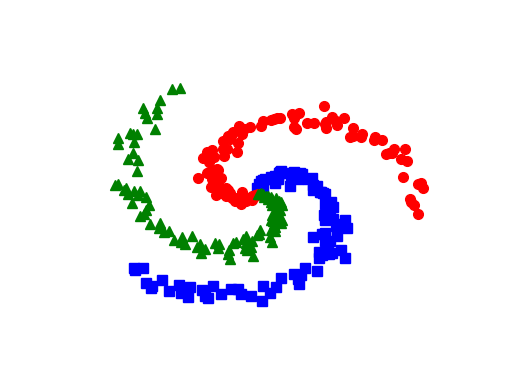

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((N*C, d0)) # data matrix (each row = single example)
y = np.zeros(N * C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7)
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'ro', markersize = 7)
plt.plot(X[2*N:, 0], X[2*N:, 1], 'g^', markersize = 7)
plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.show()

In [2]:
from scipy import sparse 
def convert_labels(y, C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape=(C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)

In [3]:
Y.shape

(3, 300)

With data distributed like this, Softmax Regression cannot be performed because the boundary between classes created by Softmax Regression is linear. Let's do a little experiment by adding a Hidden layer between the Input layer and output layer of Softmax Regression. The Hidden layer's Activation function is the ReLU function $f(z) = \max(z, 0)$ with the derivative:

$$f'(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{otherwise} \end{cases}$$

Now we will apply Batch Gradient Descent to this problem (because the amount of data is small). First of all, we need to find the formula to calculate activation and output.

## Feedforward calculation

Suppose the training data pairs are $(\mathbf{x}_i, \mathbf{y}_i)$ where $\mathbf{y}_i$ is a vector in one-hot form. These data points are arranged next to each other to form input matrices $\mathbf{X}$ and output matrices $\mathbf{Y}$. The feedforward step of this neural network is performed as follows:

$$
\begin{align*}
    \mathbf{Z}^{(1)} &=& \mathbf{W}^{(1)T}\mathbf{X} \newline
    \mathbf{A}^{(1)} &=& \max(\mathbf{Z}^{(1)}, \mathbf{0}) \newline
    \mathbf{Z}^{(2)} &=& \mathbf{W}^{(2)T}\mathbf{A}^{(1)} \newline
    \mathbf{\hat{Y}} = \mathbf{A}^{(2)} &=& \text{softmax}(\mathbf{Z}^{(2)})
\end{align*}
$$

Where $\mathbf{B}^{(1)}, \mathbf{B}^{(2)}$ are bias matrices with all columns equal and equal to $\mathbf{b}^{(1)}, \mathbf{b}^{(2)}$, respectively. The loss function is calculated based on the cross-entropy function:

$$J \triangleq J(\mathbf{W, b}; \mathbf{X, Y}) = -\frac{1}{N}\sum_{i = 1}^N \sum_{j = 1}^C y_{ji}\log(\hat{y}_{ji})$$

## Backpropagation calculation

Applying the rules as presented above and the derivative according to the weight matrix of Softmax Regression, we have:

$$
\begin{align*}
    \mathbf{E}^{(2)} &= \frac{\partial J}{\partial \mathbf{Z}^{(2)}} =\frac{1}{N}(\mathbf{A}^{(2)} - \mathbf{Y}) \newline
    \frac{\partial J}{\partial \mathbf{W}^{(2)}} &= \mathbf{A}^{(1)}  \mathbf{E}^{(2)T} \ ; \ \frac{\partial J}{\partial \mathbf{b}^{(2)}} = \sum_{n=1}^N\mathbf{e}_n^{(2)} \newline
    \mathbf{E}^{(1)} &= \left(\mathbf{W}^{(2)}\mathbf{E}^{(2)}\right) \odot f’(\mathbf{Z}^{(1)}) \newline
    \frac{\partial J}{\partial \mathbf{W}^{(1)}} &= \mathbf{A}^{(0)}  \mathbf{E}^{(1)T} = \mathbf{X}\mathbf{E}^{(1)T} \ ; \ \frac{\partial J}{\partial \mathbf{b}^{(1)}} &= \sum_{n=1}^N\mathbf{e}_n^{(1)}
\end{align*}
$$

## Deploy the algorithm

In [4]:
def softmax_stable(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims = True)) # `keepdims = True` to ensure the subtraction between the Z matrix and the vector works.
    return e_z / e_z.sum(axis=1, keepdims = True) # shape (N, C)

def crossentropy_loss(Yhat, Y): 
    return -np.sum(Y.T * np.log(Yhat)) / Y.shape[1]

def mlp_init(d0, d1, d2):
    """
    Initialize W1, b1, W2, b2
    d0: dimension of input data
    d1: number of hidden units
    d2: number of output units
    """
    W1 = 0.01 * np.random.randn(d0, d1)
    b1 = np.zeros(d1)
    W2 = 0.01 * np.random.randn(d1, d2)
    b2 = np.zeros(d2)
    return (W1, b1, W2, b2)

def mlp_predict(X, W1, b1, W2, b2):
    """
    Suppose the network has been trained, predict on the test set X
    """
    Z1 = X.dot(W1) + b1    # shape (N*C, d1)
    A1 = np.maximum(Z1, 0) # shape (N*C, d1)
    Z2 = A1.dot(W2) + b2   # shape (N*C, d2)
    return np.argmax(Z2, axis=1)

def mlp_fit(W, Y, W1, b1, W2, b2, eta = 1):
    lost_hist = []
    for i in range(10000):
        ## Feedforward
        Z1 = X.dot(W1) + b1    # shape (N*C, d1)
        A1 = np.maximum(Z1, 0) # shape (N*C, d1)
        Z2 = A1.dot(W2) + b2   # shape (N*C, d2)
        Yhat = softmax_stable(Z2) # shape (N*C, d2)

        if i % 1000 == 0: # print loss after each 1000 iterations
            loss = crossentropy_loss(Yhat, Y)
            print("iter %d, loss: %f" %(i, loss))
            lost_hist.append(loss)

        # Backpropagation
        E2 = (Yhat - Y.T)/N # shape (N*C, d2)
        dW2 = np.dot(A1.T, E2) # shape (d1, d2)
        db2 = np.sum(E2, axis = 0) # shape (d2,)
        E1 = np.dot(W2, E2.T) # shape (d1, N*C)
        E1[Z1.T <= 0] = 0 # gradient of ReLU, shape (d1, N*C)
        dW1 = np.dot(X.T, E1.T) # shape (d0, d1)
        db1 = np.sum(E1, axis = 1) # shape (d1,)

        # Gradient Descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2

    return (W1, b1, W2, b2, lost_hist)    

(W1, b1, W2, b2) = mlp_init(d0, 500, 3)
(W1, b1, W2, b2, loss_hist) = mlp_fit(X, Y, W1, b1, W2, b2)

iter 0, loss: 1.098540
iter 1000, loss: 0.036302
iter 2000, loss: 0.026107
iter 3000, loss: 0.023024
iter 4000, loss: 0.021271
iter 5000, loss: 0.018791
iter 6000, loss: 0.019079
iter 7000, loss: 0.017532
iter 8000, loss: 0.016481
iter 9000, loss: 0.016749


In [5]:
Y_pred = mlp_predict(X, W1, b1, W2, b2)
print('Accuracy: %.2f %%' % (100*np.mean(Y_pred == y))) # `axis=1` means the index of the maximum value in each row

Accuracy: 99.33 %


## Visualize the results

Text(0.5, 1.0, 'Hidden units = 500\nAccuracy = 99.33 %')

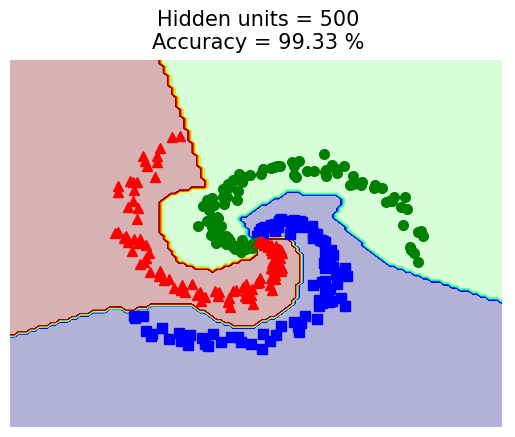

In [6]:
d0 = 2
d1 = h = 500 # size of hidden layer
d2 = C = 3

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size) # .ravel() returns contiguous flattened array (1D array with all the input-array elements and with the same type as it).
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1)).T # .vstack() is used to stack arrays in sequence vertically (row wise).
Z = mlp_predict(X0, W1, b1, W2, b2)
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .3)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7)
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize = 7)
plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize = 7)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.axis('off')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
str0 = 'Hidden units = ' + str(d1) + str('\nAccuracy = %.2f %%' % (100*np.mean(Y_pred == y)))
plt.title(str0, fontsize = 15)

# Avoid overfitting the neural network with weight decay

With weight decay, the loss function will be added with a regularization quantity of the form:

$$\lambda R(\mathbf{W}) = \lambda\sum_{l=1}^L||\mathbf{W}^{(l)}||_F^2$$

that is, the sum of Frobenius norm squares of all coefficient matrices. Note that when working with multilayer neural networks, bias is rarely regularized. This is also the reason why we should separate the coefficient matrix and bias vector when working with multilayer neural networks. Minimizing the new loss function (with the regularization term) will cause the components of the coefficient vectors $\mathbf{W}^{(l)}$ to not be too large, and even many components will be close to zero. This makes it safe to have many hidden units because many of them are close to zero.

Next, we will do another example in two-dimensional space. This time, we will use the scikit-learn library.

In [7]:
import numpy as np 
from sklearn.neural_network import MLPClassifier

np.random.seed(1)

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
y = np.asarray([0]*N + [1]*N + [2]*N) # y = [0, 0, ..., 0, 1, 1, ..., 1, 2, 2, ..., 2]

alpha = 0.01 # regularization parameter
clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(500)) # lbfgs is a optimization algorithm
clf.fit(X, y)

y_pred = clf.predict(X) 

acc = 100*np.mean(y_pred == y)
print('Training accuracy: %.2f %%' % acc)

Training accuracy: 100.00 %


/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In the code above, the `alpha` property is the regularization parameter $\lambda$. Larger `alpha` will make the components in the coefficient matrices smaller. If there are many hidden layers, for example two with the number of hidden units `10` and `100` respectively, we need to declare `hidden_layer_sizes=(10, 100)`. When `alpha` is as small as `0.01`, the boundaries found do not look natural and the area defining the green layer is not continuous. Although the accuracy on this training set is 100%, we can observe that overfitting has occurred. With `alpha = 0.1`, the results show that the territories of the classes are continuous, but overfitting still occurs. When the alpha was higher, the accuracy was reduced but the boundaries were more natural.

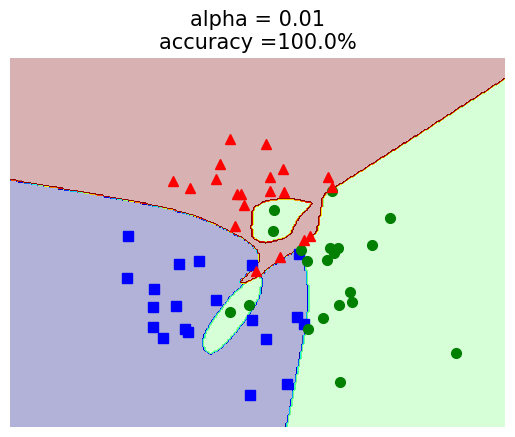

In [8]:
xm = np.arange(-4, 4, 0.025)
xlen = len(xm)
ym = np.arange(-4, 4, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1)).T
Z = clf.predict(X0)
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .3)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7)
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize = 7)
plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize = 7)

plt.axis('off')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
str0 = 'alpha = ' + str(alpha) + '\naccuracy =' + str(acc) + '%'
plt.title(str0, fontsize = 15)

plt.show()

/home/letruongzzio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training accuracy: 100.00 %


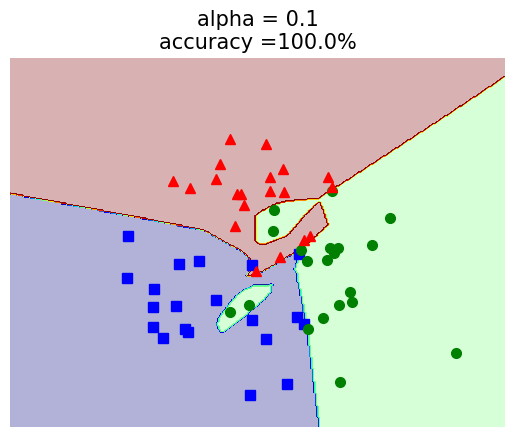

In [9]:
alpha = 0.1 # regularization parameter
clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(500))
clf.fit(X, y)

y_pred = clf.predict(X) 

acc = 100*np.mean(y_pred == y)
print('Training accuracy: %.2f %%' % acc)

xm = np.arange(-4, 4, 0.025)
xlen = len(xm)
ym = np.arange(-4, 4, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1)).T
Z = clf.predict(X0)
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .3)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7)
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize = 7)
plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize = 7)

plt.axis('off')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
str0 = 'alpha = ' + str(alpha) + '\naccuracy =' + str(acc) + '%'
plt.title(str0, fontsize = 15)

plt.show()

Training accuracy: 33.33 %


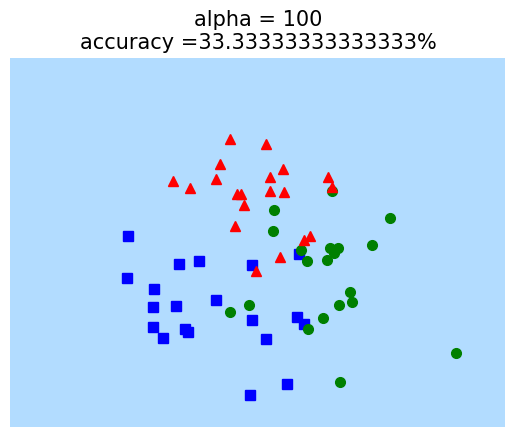

In [10]:
alpha = 100 # regularization parameter
clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(500))
clf.fit(X, y)

y_pred = clf.predict(X) 

acc = 100*np.mean(y_pred == y)
print('Training accuracy: %.2f %%' % acc)

xm = np.arange(-4, 4, 0.025)
xlen = len(xm)
ym = np.arange(-4, 4, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1)).T
Z = clf.predict(X0)
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .3)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7)
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize = 7)
plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize = 7)

plt.axis('off')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
str0 = 'alpha = ' + str(alpha) + '\naccuracy =' + str(acc) + '%'
plt.title(str0, fontsize = 15)

plt.show()